<center><h1>Module 9</h1></center>

This week we will work on what is called an *Artifical Neural Net*, also known as a *multi-layer perceptron* (MLP) or a *deep-learning model*.

Although we have been working with machine learning models up to now, i.e., KNN and Naive Bayes, this is the first place where we will actually see "learning" taking place. It is pretty cool.

#Artificial Neural Network overview

I am going to use pictures to give you intuition on how an ANN works. First, here is an abstract view of an ANN. The numbers on the left are from an input vector. Instead of thinking of the vector being shown horizontally, think of it vertically. Looking at image below, .444 is vector[0], .333 is vector[1], etc. This input vector is also called a *sample*. You can think of it as a row from a pandas table.

<img src='https://www.dropbox.com/s/zdv3sjzssiewwf3/Screenshot%202020-02-18%2010.30.12.png?raw=1'>

The nodes (drawn as circles) on the left make up the *input layer*. What goes in a node? I'll tell you in a minute.

You can see 5 nodes in the next layer, called the *hidden layer*. This is a bit of a misnomer given there is nothing hidden about it. But that is what it is called. It might be hard to see, but every node in the input layer links its output to every node in the hidden layer. This full-connection type of network is called a *dense* network.

You can see 1 node in the next layer, called the *output layer*. How many inputs does it have? 5, one from each node in hidden layer. It has 1 output, a float. We have to decide how to interpret this float to get 0 (e.g., perished) or 1(e.g., survived). Easiest is just to round it.







##A node

What are in the circles (i.e., nodes) on the diagram above? Each node has k input lines. The outlier are the input nodes which have just 1 input line and no weights. They just pass through the value from the sample to the first hidden layer. Check out the diagram below for what the nodes look like in hidden layers and the output layer.

<img src='https://www.researchgate.net/profile/Karem_Chokmani/publication/255629329/figure/fig2/AS:339705213276163@1458003442306/The-basic-element-of-a-neural-network-node-computation.png'>

It is a bit confusing given the diagram labels the node's input as O for output. This is meant to show the input is coming from output on layer on left. The values of the outputs are floats. Each input line has its own weight W (another float). The operation of the first part of the node is simple. If you view the outputs as in one vector and the weights in a separate vector, take the dot product of the 2 vectors. You can see that in the function labeled I-sub-j, where j is the node number.

The more interesting part is what is called the Activation Function f. It takes the result of the dot-product (typically called Z) and produces the actual output of the node. If you choose a linear activation function, e.g., `f(x) = cx`, you will end up with a network that computes a linear function no matter how many layers and nodes you have. In essence, you have built a model to do linear regression. Why is that so bad? Check this problem out, the simple XOR function. You can see I can try various ways to divide the space up with a line (i.e., linearly) but nothing works. It has no linear solution.

<img src='https://www.dropbox.com/s/oeud4lstd84l88d/Screenshot%202020-02-21%2013.27.25.png?raw=1' height=300>

The problems we typically want to study are like this; they do not have a linear solution. For this reason, you are given a set of non-linear activations to choose from. I'll show you a couple below that are popular.

##RELU

 The rectified linear activation function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero. Its implementation is trivial: `max(0,x)`.

<img src='https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png' height=200>

##Sigmoid

Produces a sigmoid or "S" curve with following function (the logistic version produces a value between 0 and 1):

<img src='https://www.dropbox.com/s/58hr9e4iusnmapc/Screenshot%202020-02-18%2014.02.06.png?raw=1'>

<img src='https://www.dropbox.com/s/wdqdl22m2l7jruo/Screenshot%202020-02-18%2014.02.21.png?raw=1'>

##Others

See https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e for a nice table of activation functions you have to choose from. We will only use RELU and SIGMOID for our examples.

##How is an ANN actually implemented?

I hinted at the implementation already. What is a node? It really is its vector of weights on the outputs from the preceding layer. So if we store all our node weights in a matrix (one matrix per layer), and we have a vector of outputs (from preceding layer), then we are just doing a dot-product of the output vector against the weight matrix. This will produce an intermediate value (called Z). Now we just multiply Z by the activation function to get the node  output.

##CHANGE TO GPU!

Before you start running code, go under Runtime and Change runtime type and selcect GPU. It will give you a speed up this week.

# Challenge 1

I'd like you to start by building your own neural network from scratch. Well, not totally from scratch. We can use numpy.

Please define the functions below, which we will use later.

In [0]:
import numpy
from typing import TypeVar, Callable
narray = TypeVar('numpy.ndarray')

In [0]:
import numpy as np
import math


Please define dot to take the dot-product of two vectors. You can look up dot-product if you have forgotten what it is.

Hint: numpy knows about dot-products :)

In [0]:
#what I am calling input is actually array coming from output of previous layer

def dot(weights:narray, input:narray) -> float:
  return np.dot(np.array(weights), np.array(input))


In [0]:
wts = [.5, .4, -.2]
inp = [.002, -.09, .6]

In [0]:
dot(wts, inp)  #-0.155

-0.155

In [0]:
def sigmoid(t:float) -> float:
  return (1/(1+np.exp(-t)))


In [0]:
sigmoid(-0.155)  #0.46132739479349205

0.46132739479349205

In [0]:
def neuron_output(weights:narray, inputs:narray) -> float:
  return sigmoid(dot(weights, inputs))


In [0]:
neuron_output(wts, inp)  #0.46132739479349205

0.46132739479349205

#Challenge 2

I think we have the pieces now to define a feedforward function. It will take as argument the set of weights in a network and input values. It will output the final result/prediction.

We will get to the Titanic in a second, but first let's start with  a network that attempts to predict the value of the XOR operator. So it takes two binary numbers in and outputs a  value in range 0 to 1. We take the round of the result to get a binary number as prediction.

Here is a picture of the network.

<img src='https://codingvision.net/imgs/posts/c-backpropagation-tutorial-xor/1.png'>

<img src='https://www.dropbox.com/s/fvko9fo71pp1cpr/Screenshot%202020-02-21%2009.14.37.png?raw=1'>

##Big gotcha

Even though I show 3 layers in the network, I really only need to deal with 2 layers, the hidden and the output. The input layer just pumps data to the first hidden layer. So it is implied. The best way to view this is to think of the weights belonging to the layer on the right. Given the input layer has no weights on its left, we can leave it out. In essence, it is represented as the `input_vector` below.

##Here are weights I will use for the network

I am going to use a random distribution of weights between -1 and 1.

In [0]:
np.random.seed(seed=1234)
hidden1 = np.random.uniform(-1,1,2)  #create narray of 2 items between -1 and 1
hidden2 = np.random.uniform(-1,1,2)
output = np.random.uniform(-1,1,2)

In [0]:
xor_network = [
    # hidden layer
    [hidden1, # weights for hidden node 1 = w11 and w21
     hidden2], # weights for hidden node 2 = w12 and w22
   # output layer
   [output]]  # w13 and w23


In [0]:
'''
[[array([-0.6169611 ,  0.24421754]), array([-0.12454452,  0.57071717])],
 [array([ 0.55995162, -0.45481479])]]
'''
xor_network

[[array([-0.6169611 ,  0.24421754]), array([-0.12454452,  0.57071717])],
 [array([ 0.55995162, -0.45481479])]]

##Build your function

In [0]:
def feed_forward(neural_network:narray, input_vector:narray) -> float:

  hidden_nodes = [input_vector]

  cur_layer = 0
  for i in neural_network:
      hidden_nodes.append(neuron_output(i, hidden_nodes[cur_layer]))
      cur_layer += 1
  
  return hidden_nodes[-1]

Test it on all XOR combinations.


In [0]:
for x in [0,1]:
  for y in [0,1]:
    result = feed_forward(xor_network,[x, y])
    print( x, y, round(result[0]), result[0])

#0 0 1 0.5131390777373889
#0 1 1 0.5058497839923097
#1 0 0 0.4957459470865491
#1 1 0 0.4877720338005447

0 0 1.0 0.5131390777373889
0 1 1.0 0.5058497839923097
1 0 0.0 0.4957459470865491
1 1 0.0 0.4877720338005447


Getting 50% accuracy with random weights. 

##Let's test your function on the Titanic data




In [0]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSgAgaRjiKp1nPjEDY0-hdHkf4UuepqeBidxQgsgNIqOgFC19z1wVvXfBYR6NvRvCW-uovCvDCcZ7Yx/pub?output=csv'

In [0]:
import pandas as pd

letter_table = pd.read_csv(url,
                          encoding='utf-8')

In [0]:
letter_table.head()


,Survived,Name,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0,"Braund, Mr. Owen Harris",23,2,1,0,1,1,0,0,1,1,0,0,0,1,2,1,0,0,4,1,0,1,0,1,0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,2,2,2,1,4,1,3,2,2,1,0,2,2,3,2,0,0,5,3,1,1,0,0,0,2,0
2,1,"Heikkinen, Miss. Laina",22,2,0,0,0,2,0,0,1,4,0,2,1,1,3,0,0,0,0,2,0,0,0,0,0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,3,0,1,0,6,1,0,2,1,1,0,5,2,0,0,1,1,2,2,2,2,0,0,0,2,0
4,0,"Allen, Mr. William Henry",24,2,0,0,0,2,0,0,1,2,0,0,4,2,2,0,0,0,2,0,0,0,0,1,0,1,0


In [0]:
len(letter_table)

891

##About that Length column

What it is actually useful for is calculating the number of non-letter characters in the name. Let's add a new column non_letter. It is simply the length minus the sum of letters seen.

#Challenge 3

Wrangle the new non_letter column.

In [0]:
#your code
letter_table["non_letter"] = letter_table.apply(lambda x: sum(not i.isalnum() for i in x['Name']), axis=1)

In [0]:
letter_table.head()

,Survived,Name,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,non_letter
0,0,"Braund, Mr. Owen Harris",23,2,1,0,1,1,0,0,1,1,0,0,0,1,2,1,0,0,4,1,0,1,0,1,0,0,0,5
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,2,2,2,1,4,1,3,2,2,1,0,2,2,3,2,0,0,5,3,1,1,0,0,0,2,0,10
2,1,"Heikkinen, Miss. Laina",22,2,0,0,0,2,0,0,1,4,0,2,1,1,3,0,0,0,0,2,0,0,0,0,0,0,0,4
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,3,0,1,0,6,1,0,2,1,1,0,5,2,0,0,1,1,2,2,2,2,0,0,0,2,0,10
4,0,"Allen, Mr. William Henry",24,2,0,0,0,2,0,0,1,2,0,0,4,2,2,0,0,0,2,0,0,0,0,1,0,1,0,5


##Drop some columns


In [0]:
letter_table = letter_table.drop(columns=['Name', 'Length'])

In [0]:
letter_table.head()

,Survived,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,non_letter
0,0,2,1,0,1,1,0,0,1,1,0,0,0,1,2,1,0,0,4,1,0,1,0,1,0,0,0,5
1,1,2,2,2,1,4,1,3,2,2,1,0,2,2,3,2,0,0,5,3,1,1,0,0,0,2,0,10
2,1,2,0,0,0,2,0,0,1,4,0,2,1,1,3,0,0,0,0,2,0,0,0,0,0,0,0,4
3,1,3,0,1,0,6,1,0,2,1,1,0,5,2,0,0,1,1,2,2,2,2,0,0,0,2,0,10
4,0,2,0,0,0,2,0,0,1,2,0,0,4,2,2,0,0,0,2,0,0,0,0,1,0,1,0,5


##Shuffle

In [0]:
import numpy as np
rsgen = np.random.RandomState(1234)  #use this so we get same values

In [0]:
shuffled_table = letter_table.sample(frac=1, random_state=rsgen).reset_index(drop=True)

In [0]:
shuffled_table.head()

,Survived,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,non_letter
0,1,4,1,2,1,2,1,0,4,5,0,0,2,1,0,2,3,0,3,4,1,1,0,0,0,0,0,10
1,0,2,0,0,0,0,0,1,1,1,1,1,1,2,3,2,0,0,1,1,1,0,0,0,0,0,0,5
2,0,1,0,0,0,0,1,1,2,1,1,0,0,1,1,1,0,0,3,0,1,0,0,0,0,0,0,4
3,1,1,1,0,0,4,0,0,1,3,0,0,1,2,0,0,0,0,0,6,2,2,0,0,0,1,1,5
4,0,0,0,0,0,0,0,1,2,0,1,0,0,1,1,3,0,0,2,2,0,1,0,0,0,0,0,5


Here are results.

<img src='https://www.dropbox.com/s/k8grvipefd3k6ed/Screenshot%202020-02-25%2011.40.04.png?raw=1'>

##Grab survived column then drop

In [0]:
labels = shuffled_table['Survived'].tolist()
shuffled_table = shuffled_table.drop(columns=['Survived'])
shuffled_table.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,non_letter
0,4,1,2,1,2,1,0,4,5,0,0,2,1,0,2,3,0,3,4,1,1,0,0,0,0,0,10
1,2,0,0,0,0,0,1,1,1,1,1,1,2,3,2,0,0,1,1,1,0,0,0,0,0,0,5
2,1,0,0,0,0,1,1,2,1,1,0,0,1,1,1,0,0,3,0,1,0,0,0,0,0,0,4
3,1,1,0,0,4,0,0,1,3,0,0,1,2,0,0,0,0,0,6,2,2,0,0,0,1,1,5
4,0,0,0,0,0,0,1,2,0,1,0,0,1,1,3,0,0,2,2,0,1,0,0,0,0,0,5


In [0]:
labels[:10]  #[1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

[1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

#Challenge 4

It is a good idea to scale integer values before using on network.
Use a min/max scaling algorithm on remaining columns: https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization). Use any libraries you like.

In [0]:
#your code
from sklearn.preprocessing import minmax_scale
cols = list(shuffled_table)
cols.insert(0, cols.pop(cols.index('non_letter')))
shuffled_table = pd.DataFrame(minmax_scale(shuffled_table), columns=cols)


In [0]:
shuffled_table.head()

,non_letter,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0.444444,0.333333,0.4,0.25,0.222222,0.25,0.00,1.00,0.833333,0.0,0.0,0.250,0.166667,0.000000,0.285714,0.75,0.0,0.428571,0.571429,0.2,0.2,0.0,0.0,0.0,0.000000,0.000000,0.461538
1,0.222222,0.000000,0.0,0.00,0.000000,0.00,0.25,0.25,0.166667,0.5,0.2,0.125,0.333333,0.428571,0.285714,0.00,0.0,0.142857,0.142857,0.2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.076923
2,0.111111,0.000000,0.0,0.00,0.000000,0.25,0.25,0.50,0.166667,0.5,0.0,0.000,0.166667,0.142857,0.142857,0.00,0.0,0.428571,0.000000,0.2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.111111,0.333333,0.0,0.00,0.444444,0.00,0.00,0.25,0.500000,0.0,0.0,0.125,0.333333,0.000000,0.000000,0.00,0.0,0.000000,0.857143,0.4,0.4,0.0,0.0,0.0,0.333333,0.333333,0.076923
4,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.25,0.50,0.000000,0.5,0.0,0.000,0.166667,0.142857,0.428571,0.00,0.0,0.285714,0.285714,0.0,0.2,0.0,0.0,0.0,0.000000,0.000000,0.076923


My results.

<img src='https://www.dropbox.com/s/3d2c677wz8b5ch1/Screenshot%202020-02-25%2011.42.38.png?raw=1'>

##Break into training/testing sets

We could use a fancy library method to do the splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. It takes over shuffling as well. But I am just going to do it manually.

In [0]:
training_table = shuffled_table[:600].reset_index(drop=True)  #roughly 2/3 of data
testing_table = shuffled_table[600:].reset_index(drop=True)

training_labels = labels[:600]
testing_labels = labels[600:]

##Now convert to numpy matrix

In [0]:
X_train = np.array(training_table.values.tolist())
Y_train = np.array(training_labels)

In [0]:
X_test = np.array(testing_table.values.tolist())
Y_test = np.array(testing_labels)

In [0]:
X_train[:2]  #array([[0.44444444, 0.33333333, 0.4       , 0.25      , 0.22222222, ...

array([[0.44444444, 0.33333333, 0.4       , 0.25      , 0.22222222,
        0.25      , 0.        , 1.        , 0.83333333, 0.        ,
        0.        , 0.25      , 0.16666667, 0.        , 0.28571429,
        0.75      , 0.        , 0.42857143, 0.57142857, 0.2       ,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46153846],
       [0.22222222, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.25      , 0.25      , 0.16666667, 0.5       ,
        0.2       , 0.125     , 0.33333333, 0.42857143, 0.28571429,
        0.        , 0.        , 0.14285714, 0.14285714, 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07692308]])

In [0]:
Y_train[:10]  #array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [0]:
X_test[:2]  #array([[0.22222222, 0.        , 0.2       , 0.5       , 0.11111111, ...

array([[0.22222222, 0.        , 0.2       , 0.5       , 0.11111111,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.        , 0.125     , 0.5       , 0.        , 0.14285714,
        0.        , 0.        , 0.28571429, 0.28571429, 0.2       ,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07692308],
       [0.11111111, 0.33333333, 0.2       , 0.25      , 0.        ,
        0.        , 0.        , 0.25      , 0.33333333, 0.        ,
        0.2       , 0.125     , 0.33333333, 0.        , 0.42857143,
        0.        , 0.        , 0.71428571, 0.14285714, 0.2       ,
        0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.07692308]])

In [0]:
Y_test[:10]  #array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

##Now ready to set up the model

So our input layer will have 27 nodes. Let's build 2 hidden layers:

* Hidden layer 1 has 5 nodes.
* Hidden layer 2 has 3 nodes.

And we have an Output layer of one node.


In [0]:
#generate random weights for all the nodes

np.random.seed(seed=1234)
hidden1_1 = np.random.uniform(-1,1,27)  #need 27 to match 27 input values
hidden1_2 = np.random.uniform(-1,1,27)  
hidden1_3 = np.random.uniform(-1,1,27)  
hidden1_4 = np.random.uniform(-1,1,27)  
hidden1_5 = np.random.uniform(-1,1,27)  

hidden2_1 = np.random.uniform(-1,1,5)  #need 5 to match 5  values from hidden 1
hidden2_2 = np.random.uniform(-1,1,5)  
hidden2_3 = np.random.uniform(-1,1,5) 

output = np.random.uniform(-1,1,3)    #need to 3 match  3 values from hidden 2

In [0]:
titanic_network = [
    # hidden layer 1
    [hidden1_1,
     hidden1_2,
     hidden1_3,
     hidden1_4,
     hidden1_5],
     # hidden layer 2
    [hidden2_1,
     hidden2_2,
     hidden2_3],
   # output layer
   [output]]


In [0]:
titanic_network

[[array([-0.6169611 ,  0.24421754, -0.12454452,  0.57071717,  0.55995162,
         -0.45481479, -0.44707149,  0.60374436,  0.91627871,  0.75186527,
         -0.28436546,  0.00199025,  0.36692587,  0.42540405, -0.25949849,
          0.12239237,  0.00616633, -0.9724631 ,  0.54565324,  0.76528238,
         -0.27022803,  0.23079236, -0.84923752, -0.26235199,  0.8662802 ,
          0.30275629, -0.20559484]),
  array([ 0.57746029, -0.36632776,  0.13619731,  0.73825478, -0.12765315,
          0.60429528, -0.71246635,  0.40852194,  0.40916262, -0.56241579,
          0.84973526, -0.11571849,  0.81863192, -0.88038155, -0.63142583,
         -0.90528944,  0.34976189,  0.18924956,  0.06662033, -0.91335187,
          0.12286616, -0.34066311,  0.00593367, -0.77621136,  0.21438741,
          0.13188929, -0.98647188]),
  array([ 0.23488342,  0.82424577,  0.58104827,  0.98416293,  0.91760352,
          0.58392827, -0.42949808,  0.24983341, -0.04381241, -0.60864964,
         -0.2353651 , -0.89225263, -0.

<pre>
[[array([-0.6169611 ,  0.24421754, -0.12454452,  0.57071717,  0.55995162,
         -0.45481479, -0.44707149,  0.60374436,  0.91627871,  0.75186527,
         -0.28436546,  0.00199025,  0.36692587,  0.42540405, -0.25949849,
          0.12239237,  0.00616633, -0.9724631 ,  0.54565324,  0.76528238,
         -0.27022803,  0.23079236, -0.84923752, -0.26235199,  0.8662802 ,
          0.30275629, -0.20559484]),
  array([ 0.57746029, -0.36632776,  0.13619731,  0.73825478, -0.12765315,
          0.60429528, -0.71246635,  0.40852194,  0.40916262, -0.56241579,
          0.84973526, -0.11571849,  0.81863192, -0.88038155, -0.63142583,
         -0.90528944,  0.34976189,  0.18924956,  0.06662033, -0.91335187,
          0.12286616, -0.34066311,  0.00593367, -0.77621136,  0.21438741,
          0.13188929, -0.98647188]),
  array([ 0.23488342,  0.82424577,  0.58104827,  0.98416293,  0.91760352,
          0.58392827, -0.42949808,  0.24983341, -0.04381241, -0.60864964,
         -0.2353651 , -0.89225263, -0.09670318,  0.96400948, -0.7521146 ,
         -0.7612382 ,  0.47704611,  0.17460727, -0.05673493, -0.78574637,
         -0.54156287,  0.79993039, -0.16649292,  0.07170333, -0.98758297,
         -0.39871659, -0.12621366]),
  array([ 0.22429799,  0.83639615,  0.25147334,  0.41199513, -0.70033257,
          0.49212682,  0.66201398,  0.26745154, -0.12338024, -0.69485445,
          0.13681923,  0.05644856,  0.90285753, -0.03928164,  0.00511913,
          0.07375639,  0.63840413, -0.88576872,  0.33884349,  0.53423326,
          0.41623072,  0.59373437,  0.11552166,  0.93167306, -0.7056862 ,
         -0.940706  ,  0.18778699]),
  array([-0.7718686 ,  0.9016197 , -0.34858517, -0.61276262, -0.0843767 ,
          0.84080514,  0.75813832, -0.49476849, -0.30398241, -0.63482254,
          0.8035921 ,  0.41305633,  0.45331692,  0.80017567,  0.5583276 ,
          0.19830956, -0.41774951, -0.69720947, -0.32965068,  0.31510355,
         -0.85331491, -0.88998721, -0.35361037,  0.18096361,  0.70779713,
         -0.42587515, -0.65386555])],
 [array([-0.73195759,  0.98930766, -0.64100426, -0.36490635,  0.13658281]),
  array([-0.98130285,  0.80129724,  0.95448286,  0.11378936, -0.83045231]),
  array([-0.33399507,  0.45685735, -0.71512925,  0.10493788, -0.45391348])],
 [array([ 0.94899028,  0.33557381, -0.48869343])]]
 </pre>

Check out first 10 from training data.

In [0]:
for i in range(10):
  inpt = X_train[i]
  actual = Y_train[i]
  result = feed_forward(titanic_network,inpt)
  print( actual, round(result[0]), result[0])


1 1.0 0.5753822908727729
0 1.0 0.5777981168615596
0 1.0 0.5881068635282896
1 1.0 0.5758221195406585
0 1.0 0.5819629330408638
0 1.0 0.5623026464326041
0 1.0 0.5814642469558086
0 1.0 0.5859836246057499
1 1.0 0.5797286101480975
0 1.0 0.594612843035874


<pre>
1 1 0.5753822908727729
0 1 0.5777981168615595
0 1 0.5881068635282896
1 1 0.5758221195406585
0 1 0.5819629330408638
0 1 0.5623026464326041
0 1 0.5814642469558086
0 1 0.5859836246057499
1 1 0.5797286101480975
0 1 0.594612843035874
</pre>

#Big problem

We are not getting very good results. Everything around .5. Reminds me of when we averaged all the Dracula colors together and we got mush.

What we are missing is the "learning" in machine learning. In particular, after we do a feedforward we are missing a step that looks at how wrong we were. Jargon for this is computing the *loss*. If the actual was 1 and our output was 0, we have a big loss. If our output was .9, we have a small loss. Let's assume we have a loss function (also called a *cost function*) that looks roughly like this, where yhat is predicted value and y is actual value.

<pre>
loss_function(yhat:float, y:float) -> loss:float
</pre>

The actual choice of the loss_function can be critical, but we will leave that until later. For now, assume we have computed the loss. What now?
Kind of simple in concept: find a way to lower the loss. Duh. What can we change? The weights. They are the only thing in the network we can play with. But how to change them? One strategy is to make random changes to a random set of the weights. Maybe (in a million years) we will stumble upon winning weights. This stragegy is for the optimist :)

##Really breakthrough idea

Here is a more goal-directed approach. We want to reduce the loss, right? And the loss function is producing the loss. So we ask the loss function what can we change to get it to produce a smaller loss. The answer is we can change the input to the loss function. Now we need some piece of mathematics that can relate changes to a function's input to changes in its output. We have such a thing! It is called differential equations. We can use it to reason backwards: given I want a change in output, how should I change input? A few reminders from your calculus course:

* The *derivative* of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to a change in its argument (input value).

* The derivative of a function of a single variable at a chosen input value, when it exists, is the *slope of the tangent line* to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value. 

* A *partial derivative* of a function of several variables is its derivative with respect to one of those variables, with the others held constant.

* The *chain rule* is a formula to compute the derivative of a composite function. That is, if f and g are differentiable functions, then the chain rule expresses the derivative of their composite `f ∘ g` — the function which maps x to  `f(g(x))` - in terms of the derivatives of f and g.

Let's say we figure out how to use a partial derivative and we come up with a need to change the loss function's yhat input by delta. But what is the yhat value for the loss function? It is the output of the network. So we need a change in the network output of delta. What produces the network output? The output node. So we recurse. We ask how to change the inputs to the output node to get us the change we want. There are 5 weights in our Titanic example. How can we change those? Once we figure that out, we have to take into account the weights on the 2nd hidden layer. How do we change those? Once we figure that out, we backtrack to the 1st hidden layer. Once we have weight changes for the 1st hidden layer we are done. There is nowhere left to head upstream other than the actual input data, which we can't change. The jargony term for this moving from back to front is *back-propogation* or *backprop* for short. We are moving back (from loss side) to front (toward the input values). And we are using partial derivates and the chain-rule to do so.

You will also hear it called `gradient descent`, which is a more geometrical/graphical way of looking at it. If you view the loss as a point on a gradient, we are working to move it toward its minimum over time.

This is all rather abstract the way I have described it. The nitty-gritty is in taking the derivative (actually, partial derivative) of the loss function and the activation functions to find the changes we need for upstream weights. We are using the `chain-rule` that tells us how to split out a change in the loss into separate pieces. And how to glue them together. If we are succsessul, you will gradually see the loss be reduced until we are happy with the accuracy. This is the "learning" in neural nets. Is learning in this way a brand new idea? I view it more as the insight that we could take well-established ideas from mathematics and apply them to this new problem. That was the breakthrough.

##The good news and the bad news

The good news is that the library we will start using shortly does all the backprop for you. So you really can use it without knowing much about what is going on under the hood.

The bad news is that I think computer science students should know how the tools they use work. But we just don't have time in the quarter. However I urge you to take the CIS472 course on machine learning to get deeper view into the subject.

##Need a few more concepts

When we are training our model, we take values from X_train and Y_train. For each sample in X_train, we do a feedforward. We compute the loss using Y_train and do backward propogation to modify the weights. We then move on to the next sample. So if we have 600 samples in X_train, we would have 600 occurences of feedforward-backpropogation. Many of the weights could be changed, at least slightly, 600 times. Once through all the samples is called one *epoch* (eee pok).

Typically, we have many epochs. So we go through X_train once, then again and again. How may times? You choose. The number of epochs is up to you. It is called a *hyperparameter*. BTW: the choice of the loss function is also a hyperparameter.

Another hyperameter is called `batch size`. This says how many feedforwards you want to do before doing a backprop. If batch_size=1, we do a backprop for every feedforward. Let's say I set batch_size to 10. Then I would do 10 feedforwards before doing a backprop. For the 10 feedforwards, I would calculate a cumulative loss. Then use that for the backprop.

Why would you ever use anything but batch_size=1? Partly efficiency. Backprop is the costly operation in a neural net and a size of 1 forces a backprop on each sample. Just as imporant, on many problems a larger batch size can lead you more quickly to good results. It's kind of like a batch size of 1 (overly) micromanages the weights whereas larger batch sizes gives the network a bigger picture.



#Let's bring in the keras library

I am going to use an ANN library called *keras*. keras was created to be a friendlier interface on top of *tensorflow*, another powerful Python library. And I think you will see they succeeded. It is pretty dang easy to build an ANN using keras.

Let's bring in keras and 2 of its important pieces: *Sequential*, which builds the type of left-to-right model I have in the top figure and *Dense*, which says all nodes are fully connected.



In [0]:
# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

##Using tensorflow 2

This is the latest version, circa early 2020. In this new version, keras has been brought more firmly into tensorflow as a sub-library. Prior to 2.x, you would have seen something like `import keras`, i.e., it was a standalone library.

Code below also checks to see if you have GPU turned on. A GPU definitely speeds things up when using tensorflow.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found - turn it on under Runtime')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
# Bring in keras components

from tensorflow.python.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import plot_model


We need to set 2 seeds to make sure we have reporducable results, one for numpy and one for tensorflow. Should they be combined by the developers? Probably. But they are separate for now.

In [0]:
from numpy.random import seed
set_random_seed = tf.random.set_seed  #just renaming the tensorflow function


In [0]:
#libraries to help visualize training results later
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8

##I'll build an ANN step by step

Let's try the xor example but now in keras. Here is a link to an article that goes into more detail: https://medium.com/analytics-vidhya/understanding-basics-of-deep-learning-by-solving-xor-problem-cb3ff6a18a06. I am just going to highlight the main points.

##First, wrangle data into form keras likes

I tacked on _xor so we don't lose our titanic data. We will use it in a minute.

In [0]:
X_train_xor = np.array([[0,0],[0,1],[1,0],[1,1]]) #4 samples of 2 features each
Y_train_xor = np.array([[0],[1],[1],[0]])  #labels that go with samples


##Now start building the model

I'll try to be faithful to our xor model above, i.e., 1 hidden layer of 2 nodes and a single output node. I'll use sigmoid as the activation function to get us a value between 0 and 1.

In [0]:
set_random_seed(1234)  #for tensorflow
seed(1234)             #for numpy

model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_dim=2))  #first hidden layer needs number of inputs


##Let's go through this

We are adding the first "real" layer to our model, which is the hidden layer. As an ANN is typically drawn going horizontally, this is the first hidden layer on the left. We will end up with 2 nodes (units) in this layer. The output of each node goes to the next layer.

The choice of units=2 is just a guess. It could be 10 or whatever. It is a hyperparameter.

input_dim=2 says we expect each sample (i.e., input vector) to be of length 2. We only need this on the first hidden layer if have more than 1.

We get to choose the activation function. We are choosing sigmoid for this first layer. Each layer can have its own activation function.

##Output layer next

In [0]:
model.add(Dense(units=1, activation='sigmoid'))

So one unit (node) with activation sigmoid. We don't use input_dim because that only goes on the first hidden layer.

In [0]:
'''
[array([[ 0.09317696, -0.3316152 ],
        [ 0.19995213, -0.6274897 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.4939432],
        [-1.021909 ]], dtype=float32),
 array([0.], dtype=float32)]
 '''

model.get_weights() # returns a numpy list of weights



[array([[ 0.09317696, -0.3316152 ],
        [ 0.19995213, -0.6274897 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.4939432],
        [-1.021909 ]], dtype=float32),
 array([0.], dtype=float32)]

You should match my initial weights above if you set the seeds correctly. So are all starting with same initial weights.

##That's it!

We have built our model. A lot easier than what you had to do in Python, right.

Couple ways to look at model summary.

In [0]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


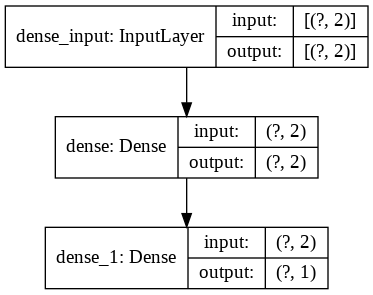

In [0]:
plot_model(model, show_shapes=True)  #ignore the "?"

##Test before we do training

We are asking our model to predict based just on the random weights it has currently (prior to training). We can use `model.predict` to do that.

In [0]:
'''
[[0.31909668]
 [0.34812596]
 [0.33504122]
 [0.36215124]]
 '''

print(model.predict(X_train_xor))  #give it all the training data (only 4 samples)

[[0.31909668]
 [0.34812596]
 [0.33504122]
 [0.36215124]]


##Not good enough

Rounding we get [0, 0, 0, 0]. So 50% correct. I want 100% accuracy. And I am going to use training to do that. There are 2 steps I have to take:

1. I have to compile the model into a form that is ready to train. One line of code.

2. I have to train the model to get new weights. One line of code.

The tricky part is setting the hyperparameters.

##Set hyperparameters below

In [0]:
loss_choice = 'binary_crossentropy'
optimizer_choice = 'sgd'
epochs_choice = 20000
batch_choice = 1

Let's discuss these.

* *loss_choice*. This is the function we will use to compute how badly we did on a specific sample (or batch of samples). A typical loss function would be *mean-squared-error* (MSE), which is general purpose. But I am choosing a loss function that is well-suited to the loss when making binary predictions. In summary, it attempts to compute loss on how close we are to the correct value. So not just right-or-wrong, but instead how-right-or-wrong. This article has a nice visualization of it: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a.

* *optimizer_choice*. This is an algorithm that tries to make training/learning more efficient. The typical choice is `adam`. But I am using `sgd` instead. Why? sgd stands for *stochastic gradient descent*. A mouthful! In essence, sgd tries to randomize training. I found it works well with the xor example, where adam truly stinks. `adam` might be popular, but it does not work on every problem.

* Why 20000 epochs? I admit a played around with this. I found this was an ok value to get to 100% accuracy. As a rule, I would not normally start this high. I'd start small and creep up as necessary.

* Why batch size of 1? Mostly a place to start and move up as necessary.

##Get ready for training

Compilation step sets the loss function and optimizer.

In [0]:
model.compile(loss=loss_choice,
              optimizer=optimizer_choice,
              metrics=['binary_accuracy'])  #metrics is just to help us to see what is going on. kind of debugging info.

##Get ready for learning!

The method `fit` does the training.

The variable `training` will hold the history of training so we can look at it later. This is a huge help in deciding how to adjust hyperparameters.

This took me 3 minutes.

In [0]:
%%time

training = model.fit(X_train_xor, Y_train_xor, epochs=epochs_choice, batch_size=batch_choice, verbose=0)  #3 minutes

CPU times: user 3min 13s, sys: 15.8 s, total: 3min 29s
Wall time: 2min 41s


Now let's predict again after learning. Notice how we have driven the 0s close to 0 and the 1s close to 1. And obtained 100% accuracy. In essence, our network has learning the XOR function. Pretty cool.

In [0]:
'''
[[0.01887057]
 [0.97339046]
 [0.97337705]
 [0.02581062]]
 '''

print(model.predict(X_train_xor))

[[0.01887057]
 [0.97339046]
 [0.97337705]
 [0.02581062]]


Predictions look correct after rounding. Let's plot the history.

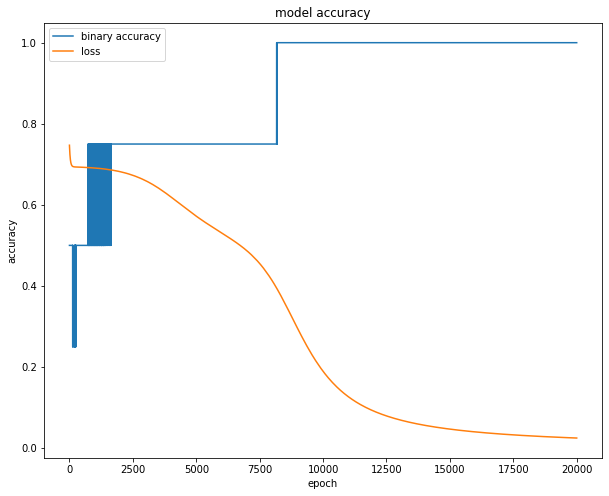

In [0]:
plt.plot(training.history['binary_accuracy'])
plt.plot(training.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['binary accuracy', 'loss'], loc='upper left')
plt.show()

<img src='https://www.dropbox.com/s/esepzkwu2bxjg4s/xor_plot.png?raw=1' height=300>

What we expect, right? As loss goes down, accuracy goes up. It looks like we hit 100% accuracy at around 9000 epochs. So 20000 a bit of overkill.

##Saving our model

There are ways to save a keras model to file. But the essence of the model are its weights. We can get those easily.

In [0]:
'''
[array([[ 4.433051 , -6.2939906],
        [ 4.433871 , -6.2999115]], dtype=float32),
 array([-6.8725147,  2.413633 ], dtype=float32),
 array([[-9.270204],
        [-9.228796]], dtype=float32),
 array([4.529244], dtype=float32)]
 '''

final_weights = model.get_weights() # returs a numpy list of weights
final_weights

[array([[ 4.433051 , -6.2939906],
        [ 4.433871 , -6.2999115]], dtype=float32),
 array([-6.8725147,  2.413633 ], dtype=float32),
 array([[-9.270204],
        [-9.228796]], dtype=float32),
 array([4.529244], dtype=float32)]

#On to Titanic

I am going to cut you lose on this one. Here is the spec for the network I'd like you to build.

* The input layer will have 27 nodes.

* Hidden layer 1 has 12 nodes and uses relu.
* Hidden layer 2 has 6 nodes and uses relu.
* Hidden layer 3 has 3 nodes and uses relu.
* Output layer of 1 node and uses sigmoid.

In [0]:
set_random_seed(1234)  #for tensorflow
seed(1234)             #for numpy


#Challenge 5

Go ahead and build up your model using specs above.

In [0]:
#your code
model = Sequential()

model.add(Dense(units=12, activation='relu', input_dim=27))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


You should match my plot.

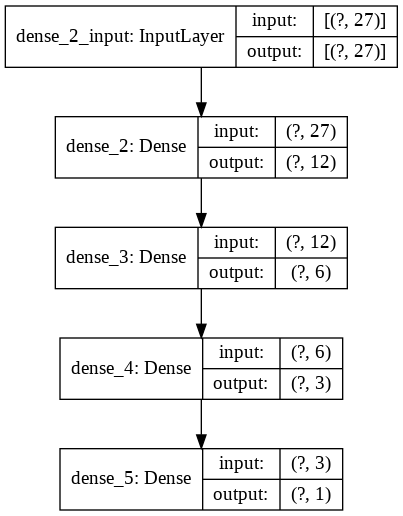

In [0]:
plot_model(model, show_shapes=True)

My plot.

<img src='https://www.dropbox.com/s/ow9ocesyg4g6ttk/titanic_match.png?raw=1'>

##Set hyperparameters below

I admit I played around with values to get to these. They are not perfect but I think in the ballpark.

In [0]:
loss_choice = 'binary_crossentropy'
optimizer_choice = 'adam'
epochs_choice = 700
batch_choice = 50  #remember that entire training set is roughly 600. That is what we are batching into 50-size chunks.

In [0]:
model.compile(loss=loss_choice,
              optimizer=optimizer_choice,
              metrics=['binary_accuracy'])

##Do training

We have already set up X_train and Y_train so should be good to go.

18 seconds for me.

In [0]:
%%time

training = model.fit(X_train, Y_train, epochs=epochs_choice, batch_size=batch_choice, verbose=0)

CPU times: user 22.6 s, sys: 1.68 s, total: 24.3 s
Wall time: 18.2 s


Let's see how we do on first 20. First is our prediction and second is actual.

In [0]:
list(zip(model.predict(X_train[:20]), Y_train[:20]))

[(array([0.92315245], dtype=float32), 1),
 (array([0.00745613], dtype=float32), 0),
 (array([0.0063823], dtype=float32), 0),
 (array([0.9962186], dtype=float32), 1),
 (array([0.37070337], dtype=float32), 0),
 (array([0.29306978], dtype=float32), 0),
 (array([0.1064915], dtype=float32), 0),
 (array([0.03372345], dtype=float32), 0),
 (array([0.67112833], dtype=float32), 1),
 (array([0.15474507], dtype=float32), 0),
 (array([0.0162261], dtype=float32), 0),
 (array([0.00029457], dtype=float32), 0),
 (array([0.0396947], dtype=float32), 0),
 (array([0.01957176], dtype=float32), 0),
 (array([0.00980114], dtype=float32), 0),
 (array([0.05148367], dtype=float32), 0),
 (array([0.00030445], dtype=float32), 0),
 (array([0.00354192], dtype=float32), 0),
 (array([0.16618107], dtype=float32), 0),
 (array([0.04914168], dtype=float32), 0)]

<pre>
[(array([0.92315215], dtype=float32), 1),
 (array([0.00745613], dtype=float32), 0),
 (array([0.00638229], dtype=float32), 0),
 (array([0.9962186], dtype=float32), 1),
 (array([0.37070322], dtype=float32), 0),
 (array([0.293068], dtype=float32), 0),
 (array([0.10649129], dtype=float32), 0),
 (array([0.03372349], dtype=float32), 0),
 (array([0.671129], dtype=float32), 1),
 (array([0.15474543], dtype=float32), 0),
 (array([0.01622608], dtype=float32), 0),
 (array([0.00029457], dtype=float32), 0),
 (array([0.03969463], dtype=float32), 0),
 (array([0.01957169], dtype=float32), 0),
 (array([0.00980115], dtype=float32), 0),
 (array([0.05148372], dtype=float32), 0),
 (array([0.00030444], dtype=float32), 0),
 (array([0.00354192], dtype=float32), 0),
 (array([0.16618052], dtype=float32), 0),
 (array([0.04914166], dtype=float32), 0)]
 </pre>

Not too bad. We did not miss any.

Let's look at final 20 epochs and see accuracy.

In [0]:
training.history['binary_accuracy'][-20:]  # ...  0.935]

[0.93666667,
 0.93333334,
 0.93,
 0.93333334,
 0.93333334,
 0.93333334,
 0.9316667,
 0.9316667,
 0.935,
 0.935,
 0.92833334,
 0.925,
 0.93333334,
 0.93333334,
 0.93333334,
 0.93333334,
 0.935,
 0.9316667,
 0.93,
 0.935]

###Prepare to be disappointed

We are getting 93% accuracy reported. That is dang good. However, it is on the training data. I predict we will see at least a 20 point drop, maybe even more, when we get to testing. Very typical. Sorry to get your hopes up. It is overfitting raising its ugly head.

Let's plot it.

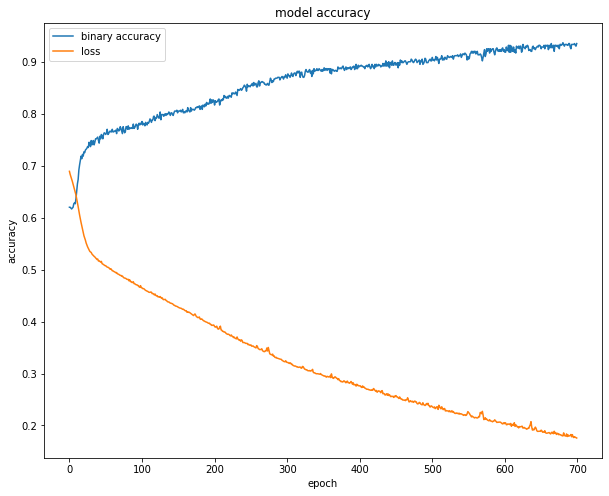

In [0]:
plt.plot(training.history['binary_accuracy'])
plt.plot(training.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['binary accuracy', 'loss'], loc='upper left')
plt.show()

<img src='https://www.dropbox.com/s/guve549ghde2quk/titanic_plot.png?raw=1' height=300>

It might be worth checking with slighly higher epoch values to see if accuracy continues to go up. I think we can use one of keras' tools to help us play around with values. It is called grid-search. I'll show you how to use it next.

#We are shifting gears

We have been poking around just to see how to use keras. Now we are going to begin managed exploration. Our goal is to find good choices for various hyperparameters. In reality, this is where most of your time and effort will lie when using an ANN to solve a problem. So let's use tools that will help us.

##First we need a model-building function

Here is a function that will build a model for us in a parameterized way. It is a precursor to using a grid-search tool that will remove some of the tedium for us when looking for good choices of hyperparameters.



In [0]:
#Need this function to do grid-search

def create_model(input_dim=27, lyrs=(12,6,3), act='relu', opt='adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(1234)
    set_random_seed(1234)
    
    model = Sequential()
    
    # create first hidden layer - must be at least one
    model.add(Dense(units=lyrs[0], input_dim=input_dim, activation=act))
    
    # create additional hidden layers - can be none
    for i in range(1,len(lyrs)):
        model.add(Dense(units=lyrs[i], activation=act))
    
    # add dropout, default is none
    if dr>0 : model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(units=1, activation='sigmoid'))  # output layer will always have sigmoid as activation to give us 0-1 range
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])  #have to change metrics to acc for grid-search
    
    return model

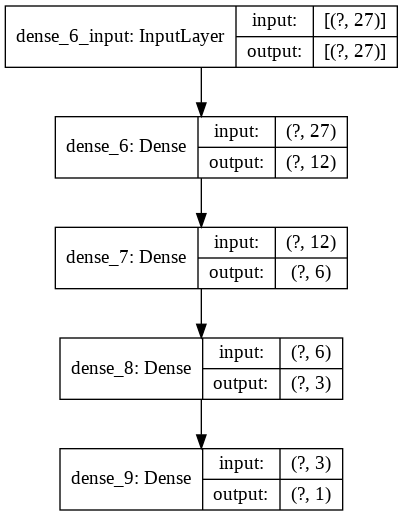

In [0]:
model = create_model()
plot_model(model, show_shapes=True)  #should look the same as before

##Grid search

Instead of tediously trying to find good values for hyperparemeters, keras gives us a way to do a systematic search. It is called grid-search. Let's take a look at it. We have multiple hyperparameters we can consider. They include:

* epochs - how many?
* batch - what size?
* optimization algorithm - sgd, adam or something else?
* layers - how many and how many nodes in each?
* dropout - what percentage? This is a new concept which I will introduce when we actually use it.

My strategy will be to take these in incremental order. First I will find the best epochs and batch size. Then I will look at optimization algorithm using epoch and bach values I obtained. Then I will look at layers and fix epochs, batch size and optimization algorithm. Etc. So get best values, fix them, and move on.

BTW: here is a good tutorial on how to use grid search in keras: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/. But note it is out of date in terms of using tensorflow 1.x instead of 2.x.




In [0]:
#Bring in libraries that we will need

from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

##First up: epochs and batch size

I could have done these individually but they kind of go together so will do them both at once.

First, we create a model that is set up to do grid-search. Notice we are using our `create_model` function from above.

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)  #use our create_model


Next we set up the search. First we provide a list of values to try for both batch_size and epochs. The only limit on the alternatives you use in these lists is the amount of time you are willing to spend waiting for the search to finish. It will do the cross-product, i.e., try all combinations. I am keeping the choices relatively small to avoid large wait times.

One strategy that makes sense is one of narrowing. You try some values and see what you get. The results may lead you to try other values. So could almost be like a binary search.

<b>Important point</b>: the dictionary you build below is used to give your parameters in `create_model` values. So the keys must match the argument names in `create_model`.

In [0]:

# define the grid search parameters
batch_size = [30, 60, 90]  #starting with just a few choices
epochs = [300, 700, 800]    #ditto

#use this to override our defaults. keys must match create_model args
param_grid = dict(batch_size=batch_size, epochs=epochs)

# buld the search grid
grid = GridSearchCV(estimator=model,   #we created model above
                    param_grid=param_grid,
                    cv=3,  #use 3 folds for cross-validation
                    verbose=2)  # include n_jobs=-1 if you are using CPU


##Cross-validation

We now have our grid set up and are ready to start the search.

One note about `cv=3` above. `cv` stands for *cross-validation*. This can be a bit confusing. Here is the general idea.

* We break off some portion of samples as our testing set. We have already done that. It is set aside and we don't use it until very end.

* Within the training set, we break off a piece called the validation set. Why do this when we have already broken off the test set? Because we are so worried about overfitting the training data that we want the testing set as final arbitor but still want to divide off pieces during training to be more sure.

* The standard way to do this extra bit is to use something called *cross-validation*. This pushes our confidence even further by breaking/folding the training data into validation chunks. If `cv=3`, it says break/fold into 3 chunks. Then we train 3 separate models and test with chunk combos
 `{chunk1+chunk2: chunk3}, {chunk1+chunk3: chunk2}, {chunk3+chunk2: chunk1}`.

We then average the accuracy over the 3 models.

Are we being paranoid about overfitting? Maybe. Is it justified? Yes!

Bottomline: we don't want to wait until the very end to test. We want to test while we are tuning our hyperparameters. And cross-validation is a standard way of doing that.

Ok, now to do the search. This can take time depending on how many combos need to be searched.

In [0]:
%%time

grid_result = grid.fit(X_train, Y_train)  #6 minutes

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=30, epochs=300 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ batch_size=30, epochs=300, total=  11.4s
[CV] batch_size=30, epochs=300 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


[CV] ........................ batch_size=30, epochs=300, total=  11.6s
[CV] batch_size=30, epochs=300 .......................................
[CV] ........................ batch_size=30, epochs=300, total=  11.4s
[CV] batch_size=30, epochs=700 .......................................
[CV] ........................ batch_size=30, epochs=700, total=  26.5s
[CV] batch_size=30, epochs=700 .......................................
[CV] ........................ batch_size=30, epochs=700, total=  26.1s
[CV] batch_size=30, epochs=700 .......................................
[CV] ........................ batch_size=30, epochs=700, total=  26.0s
[CV] batch_size=30, epochs=800 .......................................
[CV] ........................ batch_size=30, epochs=800, total=  29.9s
[CV] batch_size=30, epochs=800 .......................................
[CV] ........................ batch_size=30, epochs=800, total=  30.0s
[CV] batch_size=30, epochs=800 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.5min finished


CPU times: user 8min 33s, sys: 42.5 s, total: 9min 15s
Wall time: 6min 37s


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.691667 using {'batch_size': 60, 'epochs': 300}
0.666667 (0.018409) with: {'batch_size': 30, 'epochs': 300}
0.646667 (0.019293) with: {'batch_size': 30, 'epochs': 700}
0.651667 (0.026562) with: {'batch_size': 30, 'epochs': 800}
0.691667 (0.034238) with: {'batch_size': 60, 'epochs': 300}
0.651667 (0.013123) with: {'batch_size': 60, 'epochs': 700}
0.650000 (0.028284) with: {'batch_size': 60, 'epochs': 800}
0.686667 (0.052015) with: {'batch_size': 90, 'epochs': 300}
0.686667 (0.023921) with: {'batch_size': 90, 'epochs': 700}
0.683333 (0.014337) with: {'batch_size': 90, 'epochs': 800}


<pre>
Best: 0.690000 using {'batch_size': 60, 'epochs': 300}
0.666667 (0.018409) with: {'batch_size': 30, 'epochs': 300}
0.643333 (0.018409) with: {'batch_size': 30, 'epochs': 700}
0.648333 (0.027183) with: {'batch_size': 30, 'epochs': 800}
0.690000 (0.035590) with: {'batch_size': 60, 'epochs': 300}
0.640000 (0.021602) with: {'batch_size': 60, 'epochs': 700}
0.648333 (0.029533) with: {'batch_size': 60, 'epochs': 800}
0.686667 (0.052015) with: {'batch_size': 90, 'epochs': 300}
0.686667 (0.023921) with: {'batch_size': 90, 'epochs': 700}
0.686667 (0.018409) with: {'batch_size': 90, 'epochs': 800}
</pre>

I am going to choose 60 and 300, i.e., fix them and move on.

##Move on to Optimization Algorithm

I'll fix values from above first. I'll use these as constants in all subsequent searches.

In [0]:
batch_size = 60
epochs = 300

For optimizer choice, I am throwing in the kitchen sink. I am listing lots of optimizers. Some we have seen some (sgd, adam) and some we have not. I am sorry to gloss over optimization. It is a topic worth muliple weeks on its own. At a high level, view them as ways to make backpropogation more efficient, i.e., make learning more efficient.

In [0]:
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# set up the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)


In [0]:
%%time

grid_result = grid.fit(X_train, Y_train)  #about 2 minutes

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=   5.9s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] .......................................... opt=SGD, total=   5.9s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   5.9s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   7.1s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   7.2s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   7.2s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   6.3s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   6.1s
[CV] opt=Adagrad .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.0min finished


CPU times: user 2min 43s, sys: 12.8 s, total: 2min 56s
Wall time: 2min 9s


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.713333 using {'opt': 'SGD'}
0.713333 (0.030641) with: {'opt': 'SGD'}
0.686667 (0.034238) with: {'opt': 'RMSprop'}
0.636667 (0.035198) with: {'opt': 'Adagrad'}
0.620000 (0.031885) with: {'opt': 'Adadelta'}
0.691667 (0.034238) with: {'opt': 'Adam'}
0.693333 (0.033993) with: {'opt': 'Nadam'}


<pre>
Best: 0.713333 using {'opt': 'SGD'}
0.713333 (0.030641) with: {'opt': 'SGD'}
0.685000 (0.035355) with: {'opt': 'RMSprop'}
0.636667 (0.035198) with: {'opt': 'Adagrad'}
0.620000 (0.031885) with: {'opt': 'Adadelta'}
0.690000 (0.035590) with: {'opt': 'Adam'}
0.693333 (0.033993) with: {'opt': 'Nadam'}
</pre>

Looks like sgd is the best. We can set it below.

##Hidden layers

Next we will try out different configs of the network.

You can see I set opt = ['sgd'] to override the default of 'adam'.

In [0]:


# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=batch_size, verbose=0)

# define the grid search parameters
layers = ((8,),(10,),(10,5),(12,6),(12,8,4))  #try 5 different layers
opt = ['sgd']  #best choice from previous search
param_grid = dict(lyrs=layers, opt=opt)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] lyrs=(8,), opt=sgd ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... lyrs=(8,), opt=sgd, total=   5.8s
[CV] lyrs=(8,), opt=sgd ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] ............................... lyrs=(8,), opt=sgd, total=   5.6s
[CV] lyrs=(8,), opt=sgd ..............................................
[CV] ............................... lyrs=(8,), opt=sgd, total=   5.6s
[CV] lyrs=(10,), opt=sgd .............................................
[CV] .............................. lyrs=(10,), opt=sgd, total=   5.6s
[CV] lyrs=(10,), opt=sgd .............................................
[CV] .............................. lyrs=(10,), opt=sgd, total=   5.7s
[CV] lyrs=(10,), opt=sgd .............................................
[CV] .............................. lyrs=(10,), opt=sgd, total=   5.5s
[CV] lyrs=(10, 5), opt=sgd ...........................................
[CV] ............................ lyrs=(10, 5), opt=sgd, total=   5.8s
[CV] lyrs=(10, 5), opt=sgd ...........................................
[CV] ............................ lyrs=(10, 5), opt=sgd, total=   6.1s
[CV] lyrs=(10, 5), opt=sgd ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.5min finished


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710000 using {'lyrs': (12, 6), 'opt': 'sgd'}
0.671667 (0.035668) with: {'lyrs': (8,), 'opt': 'sgd'}
0.683333 (0.008498) with: {'lyrs': (10,), 'opt': 'sgd'}
0.685000 (0.010801) with: {'lyrs': (10, 5), 'opt': 'sgd'}
0.710000 (0.018708) with: {'lyrs': (12, 6), 'opt': 'sgd'}
0.696667 (0.013123) with: {'lyrs': (12, 8, 4), 'opt': 'sgd'}


<pre>
Best: 0.710000 using {'lyrs': (12, 6), 'opt': 'sgd'}
0.671667 (0.035668) with: {'lyrs': (8,), 'opt': 'sgd'}
0.683333 (0.008498) with: {'lyrs': (10,), 'opt': 'sgd'}
0.685000 (0.010801) with: {'lyrs': (10, 5), 'opt': 'sgd'}
0.710000 (0.018708) with: {'lyrs': (12, 6), 'opt': 'sgd'}
0.696667 (0.013123) with: {'lyrs': (12, 8, 4), 'opt': 'sgd'}
</pre>

Looks like 2 layers of (12,6) are best.

In [0]:
layers = (12,6)  #will use in next

##Dropout

What the heck is dropout. It is yet another way to deal with overfitting. I think you get the idea by now that overfitting is a huge issue. Here is how it works. During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer. Check this out.

<img src='https://www.dropbox.com/s/g1gtkrvhe467r69/dropout.jpeg?raw=1'>

Did anyone see the Harry Potter movie? Dropout reminds me of the shifting stairs in Hogwarts. Maybe more like stairs just disappearing and reappearing at random. Layers keep shifting how many nodes are acutally in them. Kind of wild.

In practive, this is how dropout is implemented in keras.
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer of 5 nodes would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out. The picture below is a view of this, where each output has a gate (shown as r) which says whether to 0 out the line, i.e., turn-off the upstream node.

<img src='https://www.dropbox.com/s/r6v4ebfr99t6lt3/Screenshot%202020-02-24%2014.57.59.png?raw=1'>

In keras, the r nodes are viewed as a separate layer that align with the layer on the left and have special nodes that either passthrough or zero-out their input. You can see in `create_model` that we actually add a dropout layer to our model.

Here are some takeaways for dropout:

* Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs. This  suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

* Because the outputs of a layer under dropout are randomly chosen, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout. This implies that we should have done  a grid-search on a combo of layer sizes and dropout rates. Some other day.

* Dropout may be implemented on any or all hidden layers in the network as well as the input layer. It is not used on the output layer.

* Dropout is more effective on those problems where there is a limited amount of training data and the model is likely to overfit the training data. That means us. We only have 600 training samples, not very big.

* Dropout is not used after training, i.e., when making a prediction with the trained network. keras takes care of this for us.

Looking back at create_model, I see this line of code coming **after** all hidden layers are added:
<pre>
    # add dropout, default is none
    if dr>0 : model.add(Dropout(dr))
</pre>
So what it says is add a dropout layer to the last hidden layer. We have 2 hidden layers so will consider dropout on only the last one. We might want to rethink whether to add dropout layers to other hidden layers if they exist. We would have to modify create_model to do this. I am punting on this. We will stick with just the last hidden layer.

Here are the values we will try: [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]. 

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=epochs, batch_size=batch_size, verbose=0)

# define the grid search parameters
layers = ((12,6),)  #from previous
opt = ['sgd']  #from previous
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops, opt=opt, lyrs=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] dr=0.0, lyrs=(12, 6), opt=sgd ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... dr=0.0, lyrs=(12, 6), opt=sgd, total=   5.8s
[CV] dr=0.0, lyrs=(12, 6), opt=sgd ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] .................... dr=0.0, lyrs=(12, 6), opt=sgd, total=   5.8s
[CV] dr=0.0, lyrs=(12, 6), opt=sgd ...................................
[CV] .................... dr=0.0, lyrs=(12, 6), opt=sgd, total=   6.0s
[CV] dr=0.01, lyrs=(12, 6), opt=sgd ..................................
[CV] ................... dr=0.01, lyrs=(12, 6), opt=sgd, total=   6.0s
[CV] dr=0.01, lyrs=(12, 6), opt=sgd ..................................
[CV] ................... dr=0.01, lyrs=(12, 6), opt=sgd, total=   6.0s
[CV] dr=0.01, lyrs=(12, 6), opt=sgd ..................................
[CV] ................... dr=0.01, lyrs=(12, 6), opt=sgd, total=   6.0s
[CV] dr=0.05, lyrs=(12, 6), opt=sgd ..................................
[CV] ................... dr=0.05, lyrs=(12, 6), opt=sgd, total=   6.1s
[CV] dr=0.05, lyrs=(12, 6), opt=sgd ..................................
[CV] ................... dr=0.05, lyrs=(12, 6), opt=sgd, total=   6.0s
[CV] dr=0.05, lyrs=(12, 6), opt=sgd ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.8min finished


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710000 using {'dr': 0.0, 'lyrs': (12, 6), 'opt': 'sgd'}
0.710000 (0.018708) with: {'dr': 0.0, 'lyrs': (12, 6), 'opt': 'sgd'}
0.708333 (0.020548) with: {'dr': 0.01, 'lyrs': (12, 6), 'opt': 'sgd'}
0.706667 (0.020950) with: {'dr': 0.05, 'lyrs': (12, 6), 'opt': 'sgd'}
0.706667 (0.020950) with: {'dr': 0.1, 'lyrs': (12, 6), 'opt': 'sgd'}
0.700000 (0.018708) with: {'dr': 0.2, 'lyrs': (12, 6), 'opt': 'sgd'}
0.681667 (0.024608) with: {'dr': 0.5, 'lyrs': (12, 6), 'opt': 'sgd'}


<pre>
Best: 0.710000 using {'dr': 0.0, 'lyrs': (12, 6), 'opt': 'sgd'}
0.710000 (0.018708) with: {'dr': 0.0, 'lyrs': (12, 6), 'opt': 'sgd'}
0.708333 (0.020548) with: {'dr': 0.01, 'lyrs': (12, 6), 'opt': 'sgd'}
0.706667 (0.020950) with: {'dr': 0.05, 'lyrs': (12, 6), 'opt': 'sgd'}
0.706667 (0.020950) with: {'dr': 0.1, 'lyrs': (12, 6), 'opt': 'sgd'}
0.700000 (0.018708) with: {'dr': 0.2, 'lyrs': (12, 6), 'opt': 'sgd'}
0.681667 (0.024608) with: {'dr': 0.5, 'lyrs': (12, 6), 'opt': 'sgd'}
</pre>

A drop out rate of 0 looks like the winner. A little surprised. This says that we will use no drop out. So be it.

##Whew, are now ready to train for real

We have best values (out of ones we chose to search) for the hyperparameters. We can use those to create the model and then train.

In [0]:
# create final model using what we found as good choices
model = create_model(lyrs=(12,6), dr=0.0, opt='sgd')

print(model.summary())

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 12)                336       
_________________________________________________________________
dense_301 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_302 (Dense)            (None, 1)                 7         
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________
None


##The validation split

The fit method allows me to do a bit more validation before full testing. Let's say I choose to use 20% of training data for validation. Then the fit method takes the last 20% of the data and chops it off the training data before training starts. At the end of each epoch, it evaluates the model with this 20%. Note it is always the same 20% because it got chopped off initially. So it is different than k-fold. This is just another way to improve the realism of accuracy by mitigating overfitting.

In [0]:
# train model on full train set, with 80/20 validation split
training = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                     validation_split=0.2,  #see discussion above
                     verbose=0)

# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

600/600 [==============================] - 0s 171us/sample - loss: 0.5417 - acc: 0.7317

acc: 73.17%


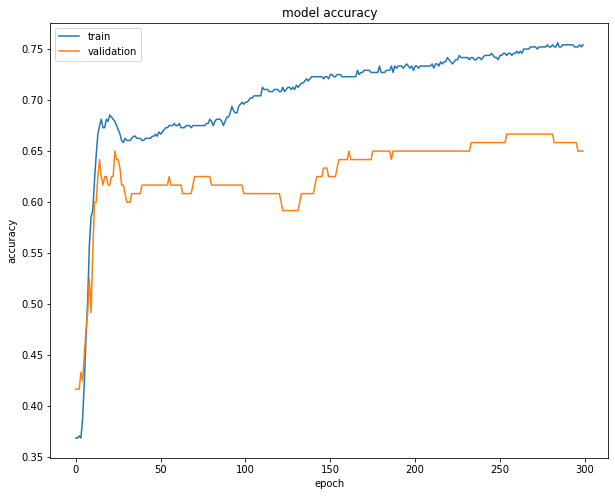

In [0]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<img src='https://www.dropbox.com/s/6qmfye31ephhfse/model_validation.png?raw=1'>

If you are an optimist, you can use the blue line. We are getting 73% accuracy at the end of training. If you are a realist, you use the orange line. It says we have about 65% accuracy. Let's bring in the test set now.

##Make Predictions on Test Set

Finally, we can attempt to predict which passengers in the test set survived. This is our real test.

In [0]:
# calculate predictions
raw_predictions = model.predict(X_test)
predictions = [int(round(x[0])) for x in raw_predictions]
cases = list(zip(predictions, Y_test))

(cases.count((0,0)) + cases.count((1,1)))/len(X_test)  #0.6941580756013745 - roughly the average of blue and orange above

0.6941580756013745

##Surprised?

Not very good. But hey, who thought that names would somehow get us a good predictor? I would be surprised if we got a better score. Then it would look like Numerology has some basis for belief! Tell me your name and I will predict your future.

#Next challenge

I decided to break out your last challenge into another notebook. It is one that asks you to apply what you have learned about ANNs to a new problem and dataset. See you in the new notebook.

##Saving functions to your library

Only function I might see saving is `create_model`. But it is fairly specific to the Titanic problem. So I don't really see anything to save. Up to you.

#Just checking

Making sure our 90% scoring model from way above does not do better. It does not.

In [0]:
set_random_seed(1234)  #for tensorflow
seed(1234)             #for numpy

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=12,  activation = 'relu', input_dim=27))
model.add(Dense(units=6,  activation = 'relu'))
model.add(Dense(units=3,  activation = 'relu'))

In [0]:
model.add(Dense(1,  activation = 'sigmoid'))

In [0]:
loss_choice = 'binary_crossentropy'
optimizer_choice = 'adam'
epochs_choice = 700
batch_choice = 50

In [0]:
model.compile(loss=loss_choice,
              optimizer=optimizer_choice,
              metrics=['binary_accuracy'])

In [0]:
%%time
training = model.fit(X_train, Y_train, epochs=epochs_choice, batch_size=batch_choice, verbose=0)

CPU times: user 23.3 s, sys: 1.73 s, total: 25.1 s
Wall time: 18.9 s


In [0]:
# calculate predictions
raw_predictions = model.predict(X_test)
predictions = [int(round(x[0])) for x in raw_predictions]
cases = list(zip(predictions, Y_test))

(cases.count((0,0)) + cases.count((1,1)))/len(X_test)

0.6632302405498282